In [19]:
import treecorr
import numpy as np
import matplotlib.pyplot as plt

In [30]:
gamma_dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/results_MR/treecorr_0p1_to_120_no_nan_15_bins/"
output_file="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/results_MR/map_cubed_treecorr_0p1_to_120_15_bins.npy"
Nlos=32
min_sep=0.1
max_sep=120
nbins=15
thetas=np.array([1, 2, 4, 8, 16, 32])
N=len(thetas)

In [31]:
correlator=treecorr.GGGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin',\
    nubins=nbins, min_u=0, max_u=1, nvbins=nbins, min_v=0, max_v=1)



map3s=np.zeros((N,N,N,8, Nlos))

for los in range(Nlos):
    print("Processing ", los)
    for i, theta1 in enumerate(thetas):
        for j, theta2 in enumerate(thetas):
            for k, theta3 in enumerate(thetas):
                
                correlator.read(gamma_dir+"/ggg_"+str(los)+"_minsep_0p1_r_"+str(nbins)+"_u_"+str(nbins)+"_v_"+str(nbins)+".dat")
                map3s[i, j, k,:,los]=correlator.calculateMap3(theta1, theta2/theta1, theta3/theta1)[:8]

np.save(output_file, map3s)

Processing  0
Processing  1
Processing  2
Processing  3
Processing  4
Processing  5
Processing  6
Processing  7
Processing  8
Processing  9
Processing  10
Processing  11
Processing  12
Processing  13
Processing  14
Processing  15
Processing  16
Processing  17
Processing  18
Processing  19
Processing  20
Processing  21
Processing  22
Processing  23
Processing  24
Processing  25
Processing  26
Processing  27
Processing  28
Processing  29
Processing  30
Processing  31


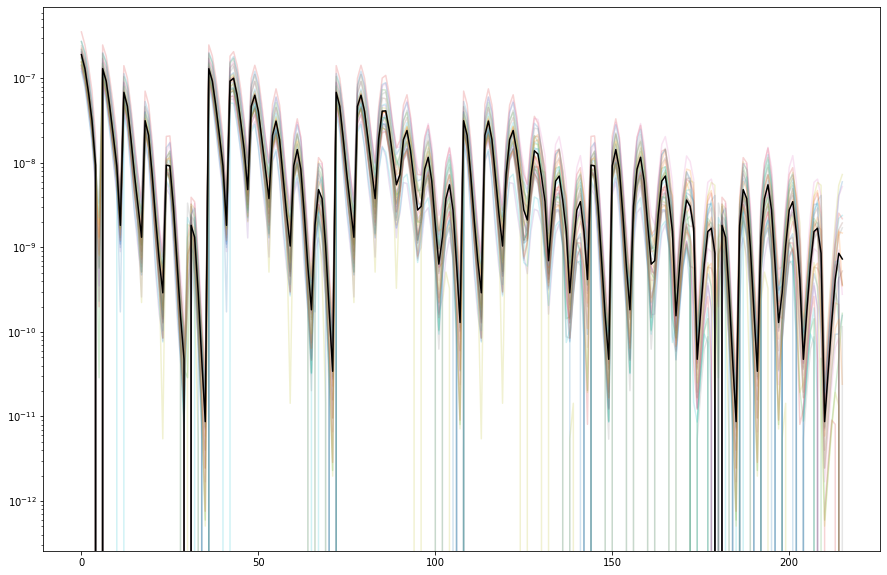

In [32]:
mean_map3=np.mean(map3s[:,:,:,0], axis=3)

fig, ax=plt.subplots(figsize=(15, 10))
plt.yscale('log')

for los in range(Nlos):
    plt.plot(map3s[:,:,:,0,los].ravel(), alpha=0.2)

plt.plot(mean_map3.ravel(), color='k')
plt.show()